## Trump Model Training

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adagrad, Adam
from tensorflow.keras import regularizers
import tensorflow as tf


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
## define paths to data files
path_to_train_data = Path("C:/Users/gutda/pycharm_projects/jass-data/filtered_to_csv/train/")
path_to_test_data = Path("C:/Users/gutda/pycharm_projects/jass-data/filtered_to_csv/test/")

In [23]:
# train data
data_train = pd.read_csv(path_to_train_data / 'filtered_data0001.csv', header=None)

In [4]:
# test data
data_test = pd.read_csv(path_to_test_data / 'filtered_data0001.csv', header=None)

In [5]:
# check how much of each trump action is there
data_train_f0 = (data_train[data_train[37]==0])
data_train_f1 = (data_train[data_train[37]==1])
data_train_f2 = (data_train[data_train[37]==2])
data_train_f3 = (data_train[data_train[37]==3])
data_train_f4 = (data_train[data_train[37]==4])
data_train_f5 = (data_train[data_train[37]==5])
data_train_f6 = (data_train[data_train[37]==6])

print(f"0 = {len(data_train_f0)}, 1 = {len(data_train_f1)}, 2 = {len(data_train_f2)}, 3 = {len(data_train_f3)}, 4 = {len(data_train_f4)}, 5 = {len(data_train_f5)}, 6 = {len(data_train_f6)}")


0 = 11999, 1 = 12325, 2 = 16495, 3 = 16178, 4 = 14856, 5 = 18270, 6 = 55951


In [7]:
# make sure every action has an equal number of samples, ignore action schiebe
data_train_f0 = data_train_f0[0: 11000]
data_train_f1 = data_train_f1[0: 11000]
data_train_f2 = data_train_f2[0: 11000]
data_train_f3 = data_train_f3[0: 11000]
data_train_f4 = data_train_f4[0: 11000]
data_train_f5 = data_train_f5[0: 11000]
data_train_f6 = data_train_f6[0: 0] #don't train on schiebe

data_train = pd.concat([data_train_f0, data_train_f1, data_train_f2, data_train_f3, data_train_f4, data_train_f5, data_train_f6])
data_train = data_train.sample(frac=1)
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
50482,0,0,0,0,0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
7403,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,5
106340,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
49764,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2
52265,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# check how much of each trump action is there
data_test_f0 = data_test[data_test[37]==0]
data_test_f1 = data_test[data_test[37]==1]
data_test_f2 = data_test[data_test[37]==2]
data_test_f3 = data_test[data_test[37]==3]
data_test_f4 = data_test[data_test[37]==4]
data_test_f5 = data_test[data_test[37]==5]
data_test_f6 = data_test[data_test[37]==6]

print(f"0 = {len(data_test_f0)}, 1 = {len(data_test_f1)}, 2 = {len(data_test_f2)}, 3 = {len(data_test_f3)}, 4 = {len(data_test_f4)}, 5 = {len(data_test_f5)}, 6 = {len(data_test_f6)}")


0 = 3906, 1 = 4096, 2 = 5459, 3 = 5373, 4 = 4830, 5 = 6093, 6 = 18647


In [10]:
# make sure every action has an equal number of samples, ignore action schiebe
data_test_f0 = data_test_f0[0:2200]
data_test_f1 = data_test_f1[0:2000]
data_test_f2 = data_test_f2[0:2000]
data_test_f3 = data_test_f3[0:2000]
data_test_f4 = data_test_f4[0:2000]
data_test_f5 = data_test_f5[0:2000]
data_test_f6 = data_test_f6[0:0] # change this value if output of 7 dimensions (with schiebe is needed)

data_test = pd.concat([data_test_f0, data_test_f1, data_test_f2, data_test_f3, data_test_f4, data_test_f5, data_test_f6])
data_test = data_test.sample(frac=1)
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
551,0,0,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5329,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1087,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,5
17258,0,0,1,0,0,1,0,1,0,0,...,0,1,1,0,1,0,0,0,0,3
536,1,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,4


## Label data for readability

In [11]:
# Add colums. Each card and the information 
# if the player played forehand or not is a feature. That means we have 37 features.
# We also remove the player_id, because we do not care in the beginning

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']
trump = ['trump']

data_train.columns = cards + forehand + trump
data_test.columns = cards + forehand  + trump

data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
50482,0,0,0,0,0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
7403,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,5
106340,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
49764,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2
52265,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Prepare x and y values

In [12]:
# colums used for extracting x and y values. The same effect could be achieved with train_test_split-Method, but 
# since we already have different files, we dont need to split the files using this method.
data_X_columns = cards + forehand
data_Y_colums = trump

x_train = data_train[data_X_columns]
y_train = data_train[data_Y_colums]

x_test = data_test[data_X_columns]
y_test = data_test[data_Y_colums]

## Create model and train it

In [13]:
# We have 37 features, so we have a node for each feature. There are 7 output categories: each trump color(4), 
# obe-abe, unde-ufe, schiebe. So we need an reducing function with 7 elements
model = keras.Sequential()
model.add(keras.layers.Dense(37, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(37, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

opt = Adam()

model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 37)                1406      
_________________________________________________________________
dense_1 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_2 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_3 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 228       
Total params: 5,852
Trainable params: 5,852
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# we need to convert the y_train to a array with 6 elements, to represent each 
# of the 6 categories, without schiebe
y_train_categorical = to_categorical(y_train)

history = model.fit(x_train, y_train_categorical, epochs=100, batch_size=100)

Train on 66000 samples
Epoch 1/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4054 - accuracy: 0.8419
Epoch 2/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.4040 - accuracy: 0.8418
Epoch 3/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.4045 - accuracy: 0.8417
Epoch 4/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.4046 - accuracy: 0.8409
Epoch 5/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.4035 - accuracy: 0.8411
Epoch 6/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.4036 - accuracy: 0.8423
Epoch 7/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4034 - accuracy: 0.8417
Epoch 8/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4030 - accuracy: 0.8416
Epoch 9/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4037 - accuracy: 0.8426
Epoch

66000/66000 [==============================] - 1s 11us/sample - loss: 0.3965 - accuracy: 0.8450
Epoch 75/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.3961 - accuracy: 0.8444
Epoch 76/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.3958 - accuracy: 0.8440
Epoch 77/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.3968 - accuracy: 0.8437
Epoch 78/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.3951 - accuracy: 0.8439
Epoch 79/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.3962 - accuracy: 0.8439
Epoch 80/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.3954 - accuracy: 0.8447
Epoch 81/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.3949 - accuracy: 0.8447
Epoch 82/100
66000/66000 [==============================] - 1s 11us/sample - loss: 0.3943 - accuracy: 0.8448
Epoch 83/100
66000/66000 [======

## Generate graphs for loss and accuracy

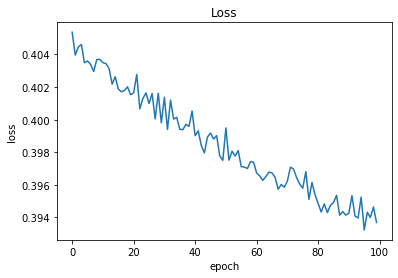

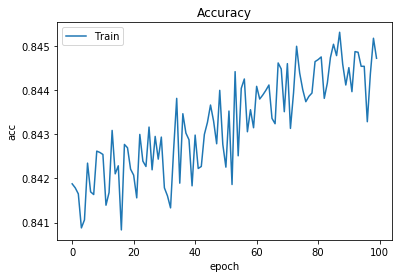

In [19]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train'], loc='upper left')

## Test model

In [24]:
y_test_categorical = to_categorical(y_test)
model.evaluate(x_test, y_test_categorical)

12200/12200 [==============================] - 0s 18us/sample - loss: 0.4651 - accuracy: 0.8213


[0.46514647878584314, 0.8213115]

In [25]:
model.save("final_model_82_games_025_mean_03_std_06_without_schieben.h5")